# Домашнее задание №1 по МОМО

## 1) Импорт библиотек

In [1]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # для создания Pipeline'ов.
from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок
from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

## 2) Набор данных

Набор данных представляет собой объявления о продажах автомобилей на вторичном рынке в Москве за 2020 год. Данные предоставлены с сайта auto.ru и взяты с платформы [kaggle](https://www.kaggle.com/datasets/pankratozzi/auto-price-prediction-moscow-2020).\
Данные содержат следующие колонки:

**Model** = Модель автомобиля\
**Year** = Год производства\
**Mileage** = Пробег, км\
**V_engine** = Объем двигателя, л\
**EngineType** = Тип топлива используемый двигателем\
**HorsePower** = Мощность двигателя, л.с.\
**Tax**	= Сумма налога на ТС\
**State** = Состояние автомобиля\
**Owners** = Количество владельцев\
**Passport** = Оригинал или дубликат ПТС\
**Customs**	= Таможенная очистка\
**Selector** = Тип трансмиссии\
**Color** = Цвет\
**CarBodyType** = Тип кузова\
**Accidents** = Количество ДТП\
**Drive** = Тип привода\
**Price** = Цена

Загрузим и посмотрим на данные:

In [2]:
# https://www.kaggle.com/datasets/pankratozzi/auto-price-prediction-moscow-2020
df = pd.read_csv('autoru_total.csv')
df.head()

,Model,Year,Mileage,V_engine,EngineType,HorsePower,Tax,State,Owners,Passport,Customs,Selector,Color,CarBodyType,Accidents,Drive,Price
0,Subaru Forester IV,2013,83800.0,2.5,Бензин,171.0,8379.0,Не требует ремонта,2 владельца,Оригинал,Растаможен,вариатор,серебристый,внедорожник 5 дв.,ДТП ненайдены,полный,1499999.0
1,Opel Zafira B Рестайлинг,2014,97265.0,1.8,Бензин,140.0,4900.0,Не требует ремонта,1 владелец,Оригинал,Растаможен,механическая,чёрный,компактвэн,NaN,передний,1000000.0
2,Kia Rio IV,2017,48000.0,1.6,Бензин,123.0,3075.0,Не требует ремонта,2 владельца,Оригинал,Растаможен,автоматическая,синий,седан,NaN,передний,945000.0
3,Skoda Octavia II (A5) Рестайлинг,2011,292000.0,1.4,Бензин,122.0,4148.0,Не требует ремонта,2 владельца,Оригинал,Растаможен,роботизированная,серебристый,лифтбек,NaN,передний,535000.0
4,Audi A6 IV (C7) Рестайлинг,2015,106205.0,1.8,Бензин,190.0,9500.0,Не требует ремонта,2 владельца,Оригинал,Растаможен,роботизированная,чёрный,седан,NaN,передний,1764000.0


In [3]:
# Рассмотрим общую информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36906 entries, 0 to 36905
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        36906 non-null  object 
 1   Year         36906 non-null  int64  
 2   Mileage      36906 non-null  float64
 3   V_engine     36906 non-null  float64
 4   EngineType   36906 non-null  object 
 5   HorsePower   36906 non-null  float64
 6   Tax          36430 non-null  float64
 7   State        36902 non-null  object 
 8   Owners       36904 non-null  object 
 9   Passport     36906 non-null  object 
 10  Customs      36905 non-null  object 
 11  Selector     36906 non-null  object 
 12  Color        36906 non-null  object 
 13  CarBodyType  36906 non-null  object 
 14  Accidents    8379 non-null   object 
 15  Drive        36906 non-null  object 
 16  Price        36906 non-null  float64
dtypes: float64(5), int64(1), object(11)
memory usage: 4.8+ MB


## 3) Разведывательный анализ данных (EDA)

### 3.1 Проведем очистку данных
Проверим и удалим сначала дубликаты:

In [4]:
# Наличие и количество дубликатов
df.duplicated().sum()

1206

In [5]:
# удаление дубликатов
df = df.drop_duplicates()
df = df.reset_index(drop=True)

Рассмотрим колонки в которых записей меньше, чем общее количество строк (36906) и проанализируем, что можно сделать

In [6]:
# Начнем со столбца Tax:
df['Tax'].describe()

count     35239.000000
mean      12394.124578
std       20209.423408
min           0.000000
25%        2925.000000
50%        5130.000000
75%       10000.000000
max      292500.000000
Name: Tax, dtype: float64

In [7]:
# Посмотрим сколько строк имеет Tax == 0
(df['Tax'] == 0).sum()

116

In [8]:
# Посмотрим примеры их
df[df['Tax'] == 0].head(3)

,Model,Year,Mileage,V_engine,EngineType,HorsePower,Tax,State,Owners,Passport,Customs,Selector,Color,CarBodyType,Accidents,Drive,Price
33,Porsche Taycan Turbo I,2020,1592.0,500.0,Электро,680.0,0.0,Не требует ремонта,1 владелец,Оригинал,Растаможен,автоматическая,синий,седан,ДТП ненайдены,полный,12600000.0
374,Nissan Leaf II (ZE1),2019,65900.0,110.0,Электро,150.0,0.0,Не требует ремонта,1 владелец,Оригинал,Растаможен,автоматическая,серый,хэтчбек 5 дв.,ДТП ненайдены,передний,1980000.0
687,Tesla Model S S85 I,2013,103000.0,266.0,Электро,362.0,0.0,Не требует ремонта,1 владелец,Оригинал,Растаможен,автоматическая,чёрный,лифтбек,NaN,задний,2530000.0


In [9]:
# Похоже это относится к Электромобилям, проверим:
df[df['Tax'] == 0]['EngineType'].value_counts()

 Электро    116
Name: EngineType, dtype: int64

Электромобили исключим из рассмотрения, т.к. они имеют совсем другие характеристики чем ДВС (V_engine для Электро нельзя сравнивать с аналогичным для ДВС) и их очень мало в выборке, что не приведет к потере данных.

In [10]:
electro_auto = df[df['EngineType'] == ' Электро']
df = df.drop(electro_auto.index)
df = df.reset_index(drop=True)

In [11]:
# Проверим сколько NaN значений
df['Tax'].isna().sum()

461

Данное количество также небольшое и можно удалить. Но мы забьем пропуски средним значением, что не сильно исказит картину данных.

In [12]:
df['Tax'].fillna(df['Tax'].median(), inplace=True)

In [13]:
# Переходим к следующей колонке.
df['State'].isna().sum()

4

In [14]:
df['State'].value_counts()

Не требует ремонта    35576
Name: State, dtype: int64

Столбец State имеет 4 пропуска, но все остальные значения имеют одно и то же значение. Удалим строки с этими пропусками и потом удалим столбец как неинформативный.

In [15]:
df.dropna(subset = ['State'], inplace=True)
df = df.drop(['State'], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35576 entries, 0 to 35579
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        35576 non-null  object 
 1   Year         35576 non-null  int64  
 2   Mileage      35576 non-null  float64
 3   V_engine     35576 non-null  float64
 4   EngineType   35576 non-null  object 
 5   HorsePower   35576 non-null  float64
 6   Tax          35576 non-null  float64
 7   Owners       35574 non-null  object 
 8   Passport     35576 non-null  object 
 9   Customs      35575 non-null  object 
 10  Selector     35576 non-null  object 
 11  Color        35576 non-null  object 
 12  CarBodyType  35576 non-null  object 
 13  Accidents    8052 non-null   object 
 14  Drive        35576 non-null  object 
 15  Price        35576 non-null  float64
dtypes: float64(5), int64(1), object(10)
memory usage: 4.6+ MB


In [17]:
# Удалим малочисленные пропуски из Owners и Customs:
df.dropna(subset = ['Owners', 'Customs'], inplace=True)

In [18]:
df['Customs'].value_counts()

Растаможен    35573
Name: Customs, dtype: int64

In [19]:
df['Owners'].value_counts()

3 или более    14968
1 владелец     11312
2 владельца     9293
Name: Owners, dtype: int64

In [20]:
# Столбец Customs также не нужен
df = df.drop(['Customs'], axis=1)

In [21]:
# Проверяем следующий столбец Accidents
df['Accidents'].value_counts()

ДТП ненайдены    8052
Name: Accidents, dtype: int64

Данный столбец заполнен очень редко, но все его значения это одно и тоже. Следовательно, мы можем удалить данный столбец т.к. он не придает вариативности данным и рассматривать данные как будто нам ничего не известно про ДТП.

In [22]:
df = df.drop(['Accidents'], axis=1)
df = df.reset_index(drop=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35573 entries, 0 to 35572
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        35573 non-null  object 
 1   Year         35573 non-null  int64  
 2   Mileage      35573 non-null  float64
 3   V_engine     35573 non-null  float64
 4   EngineType   35573 non-null  object 
 5   HorsePower   35573 non-null  float64
 6   Tax          35573 non-null  float64
 7   Owners       35573 non-null  object 
 8   Passport     35573 non-null  object 
 9   Selector     35573 non-null  object 
 10  Color        35573 non-null  object 
 11  CarBodyType  35573 non-null  object 
 12  Drive        35573 non-null  object 
 13  Price        35573 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 3.8+ MB


### 3.2 Проведем анализ признаков
Посмотрим какие категориальные и численные столбцы

In [24]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно


# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столбцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столбцов = ',len(num_columns))


Категориальные данные:	  ['Model', 'EngineType', 'Owners', 'Passport', 'Selector', 'Color', 'CarBodyType', 'Drive'] 
 Число столбцов =  8
Числовые данные:	  ['Year', 'Mileage', 'V_engine', 'HorsePower', 'Tax', 'Price'] 
 Число столбцов =  6


#### а) Анализ числовых признаков

In [25]:
# посчитаем стандартные статистические характеристики для числовых данных
df.describe()

,Year,Mileage,V_engine,HorsePower,Tax,Price
count,35573.000000,35573.000000,35573.000000,35573.000000,35573.000000,3.557300e+04
mean,2011.010373,151054.641666,2.233267,171.539510,12337.213083,1.404658e+06
std,6.717018,95570.125032,0.930795,85.216058,20106.890553,1.722245e+06
min,1923.000000,1.000000,0.500000,18.000000,216.000000,2.500000e+04
25%,2007.000000,82000.000000,1.600000,115.000000,3000.000000,4.600000e+05
50%,2012.000000,140000.000000,2.000000,150.000000,5145.000000,8.700000e+05
75%,2016.000000,201000.000000,2.500000,200.000000,9950.000000,1.700000e+06
max,2021.000000,1000000.000000,8.100000,662.000000,292500.000000,3.999000e+07


In [26]:
# Сгруппируем данные по типу трансмиссии и посчитаем некоторые статистики 
df.groupby(['Selector'],)[num_columns].agg([('median', np.median),
                                    ('Q5%', lambda x: np.percentile(x, q=5)),
                                    ('Q95%', lambda x: np.percentile(x, q=95))])

Year                   Mileage                      \
                  median     Q5%    Q95%    median       Q5%      Q95%   
Selector                                                                 
автоматическая    2013.0  2000.0  2020.0  130000.0  15198.50  309000.0   
вариатор          2013.0  2007.0  2019.0  119000.0  22000.00  250000.0   
механическая      2008.0  1993.0  2017.0  180975.0  44227.20  375680.0   
роботизированная  2014.0  2007.0  2020.0  107000.0  13703.75  229360.4   

                 V_engine           HorsePower                    Tax          \
                   median  Q5% Q95%     median    Q5%    Q95%  median     Q5%   
Selector                                                                        
автоматическая        2.2  1.5  4.7      180.0  102.0  388.00  8850.0  2525.0   
вариатор              2.0  1.5  3.5      146.0  110.0  249.00  5110.0  2457.0   
механическая          1.6  1.3  2.5      109.0   75.0  173.00  2750.0   800.0   
роботизированная      1.8  1.3  3.0      150.0  102.0  369.55  5250.0  2205.0   

                               Price                       
                     Q95%     median       Q5%       Q95%  
Selector                                                   
автоматическая    60750.0  1250000.0  270000.0  5200000.0  
вариатор          18675.0  1147000.0  460000.0  2500000.0  
механическая       7875.0   399000.0  100000.0  1265000.0  
роботизированная  57750.0  1299000.0  365450.0  4287000.0

In [27]:
# Посмотрим на корреляцию числовых столбцов
df[num_columns].corr().style.background_gradient(cmap = 'YlOrRd', vmin = -1, vmax=1) 

,Year,Mileage,V_engine,HorsePower,Tax,Price
Year,1.000000,-0.632621,0.007254,0.215988,0.157841,0.442775
Mileage,-0.632621,1.000000,-0.021223,-0.200741,-0.170362,-0.449504
V_engine,0.007254,-0.021223,1.000000,0.828410,0.693327,0.452827
HorsePower,0.215988,-0.200741,0.828410,1.000000,0.882973,0.628950
Tax,0.157841,-0.170362,0.693327,0.882973,1.000000,0.620023
Price,0.442775,-0.449504,0.452827,0.628950,0.620023,1.000000


Согласно таблице корреляции видно, что Налог и Мощность двигателя достаточно сильно коррелируют. Действительно, России сумма налога рассчитывается исходя из мощности двигателя. Таким образом, можно полностью удалить колонку **Tax**

In [28]:
df = df.drop(['Tax'], axis=1)
num_columns.remove('Tax')

#### б) Анализ категориальных признаков

Перед анализом категориальных признаков, введем новую колонку "Manufacturer" (фирма-производитель автомобиля). Данная колонка будет содержать только название изготовителя автомобиля и призвана будет отразить зависимость цены от бренда

In [29]:
df['Manufacturer'] = df['Model'].apply(lambda x: x.split()[0])
df.sample(3)

,Model,Year,Mileage,V_engine,EngineType,HorsePower,Owners,Passport,Selector,Color,CarBodyType,Drive,Price,Manufacturer
7015,BMW X3 30d xDrive III (G01),2018,73000.0,3.0,Дизель,249.0,2 владельца,Оригинал,автоматическая,серый,внедорожник 5 дв.,полный,4550000.0,BMW
33267,Audi A4 IV (B8) Рестайлинг,2013,130000.0,1.8,Бензин,170.0,2 владельца,Оригинал,вариатор,коричневый,седан,передний,895000.0,Audi
2366,Nissan Almera III (G15),2017,246000.0,1.6,Бензин,102.0,2 владельца,Оригинал,механическая,белый,седан,передний,418000.0,Nissan


In [30]:
# Добавим новую колонку в список категориальных признаков.
cat_columns.append('Manufacturer')

In [31]:
# посмотрим на число повторений в каждой категории
df[cat_columns].nunique()

Model           3118
EngineType         7
Owners             3
Passport           2
Selector           4
Color             16
CarBodyType       25
Drive              3
Manufacturer      27
dtype: int64

Оценим сколько раз встречаются значения категорий

In [32]:
# Для столбца EngineType
df['EngineType'].value_counts()

 Бензин                                29990
 Дизель                                 4944
 Бензин, газобаллонное оборудование      407
 Гибрид                                  226
 Газ, газобаллонное оборудование           3
 Дизель, газобаллонное оборудование        2
 Газ                                       1
Name: EngineType, dtype: int64

In [33]:
# Для столбца Owners
df['Owners'].value_counts()

3 или более    14968
1 владелец     11312
2 владельца     9293
Name: Owners, dtype: int64

In [34]:
# Для столбца Passport
df['Passport'].value_counts()

Оригинал    30901
Дубликат     4672
Name: Passport, dtype: int64

In [35]:
# Для столбца Selector
df['Selector'].value_counts()

автоматическая      18991
механическая         9857
роботизированная     3744
вариатор             2981
Name: Selector, dtype: int64

In [36]:
# Для столбца Drive
df['Drive'].value_counts()

передний    19530
полный      14059
задний       1984
Name: Drive, dtype: int64

In [37]:
# Для столбца CarBodyType
df['CarBodyType'].value_counts()

внедорожник 5 дв.          12859
седан                      11543
хэтчбек 5 дв.               3758
лифтбек                     1784
универсал 5 дв.             1517
минивэн                      923
компактвэн                   913
хэтчбек 3 дв.                787
купе                         710
пикап двойная кабина         230
внедорожник 3 дв.            155
фургон                       139
кабриолет                     85
родстер                       60
купе-хардтоп                  29
микровэн                      24
седан-хардтоп                 15
пикап полуторная кабина       14
пикап одинарная кабина        12
внедорожник открытый           4
тарга                          4
седан 2 дв.                    4
хэтчбек 4 дв.                  2
универсал 3 дв.                1
лимузин                        1
Name: CarBodyType, dtype: int64

In [38]:
# Для столбца Manufacturer
df['Manufacturer'].value_counts()

Toyota           3160
Ford             2881
Volkswagen       2338
Nissan           2325
Hyundai          2247
Audi             2087
BMW              2050
Kia              2002
Chevrolet        1922
Mitsubishi       1921
Skoda            1830
Mercedes-Benz    1566
Opel             1541
Renault          1539
Mazda            1308
Lexus             913
Honda             687
Porsche           679
Infiniti          541
Citroen           502
Subaru            445
Suzuki            438
Cadillac          189
MINI              177
Lifan             139
Fiat              105
SEAT               41
Name: Manufacturer, dtype: int64

In [39]:
# Для столбца Model
df['Model'].value_counts()

Ford Focus II Рестайлинг                  395
Ford Focus III                            383
Ford Focus II                             325
Volkswagen Polo V Рестайлинг              265
Chevrolet Lacetti                         261
                                         ... 
MINI Paceman Cooper S I                     1
Mercedes-Benz CLK-Класс 200 II (W209)       1
Volkswagen Transporter Long T6              1
Mazda Axela I                               1
BMW 3 серии Gran Turismo 335i VI (F3x)      1
Name: Model, Length: 3118, dtype: int64

In [40]:
(df['Model'].value_counts() == 1).sum()

941

Данные в колонке **Model** имеют очень мало повторений и в 30% случаев это единичное попадание. Считаю, что колонку **Model** можно удалить, а данные по модели можно косвенно получить из производителя, типу кузова, году выпуска, объему и мощности двигателя, трансмиссии и типу привода.

In [41]:
df = df.drop(['Model'], axis=1)
cat_columns.remove('Model')
df = df.reset_index(drop=True)

In [42]:
df.to_csv('autoru_check.csv')

## 3) Визуализация

### Гистограммы распределений

In [43]:
# автоматизируем вывод гистограмм числовых признаков библиотекой seaborn.
num_columns

['Year', 'Mileage', 'V_engine', 'HorsePower', 'Price']

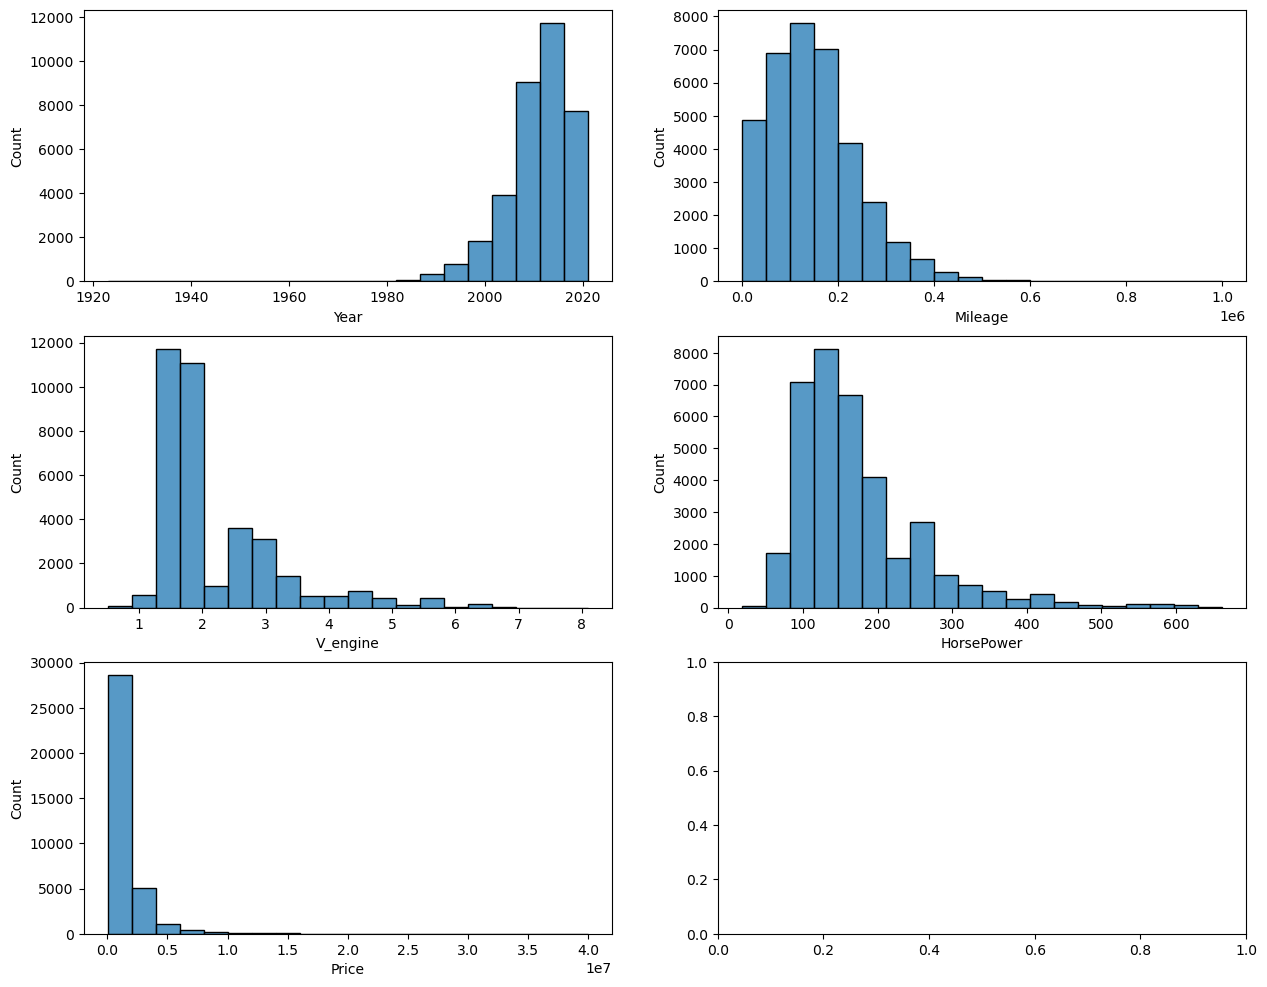

In [44]:
width = 2
height = int(np.ceil(len(num_columns) / width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(15, 12)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные
    plt.subplot(height, width, idx + 1) # берем конкретную ячейку из заранее подготовленную заготовки
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=df, x=column_name, bins = 20); 

In [45]:
# Из анализа гистограммы видно, что нужно удалить очень старые авто:
old_auto = df[(df['Year'] < 1990)]
df = df.drop(old_auto.index)

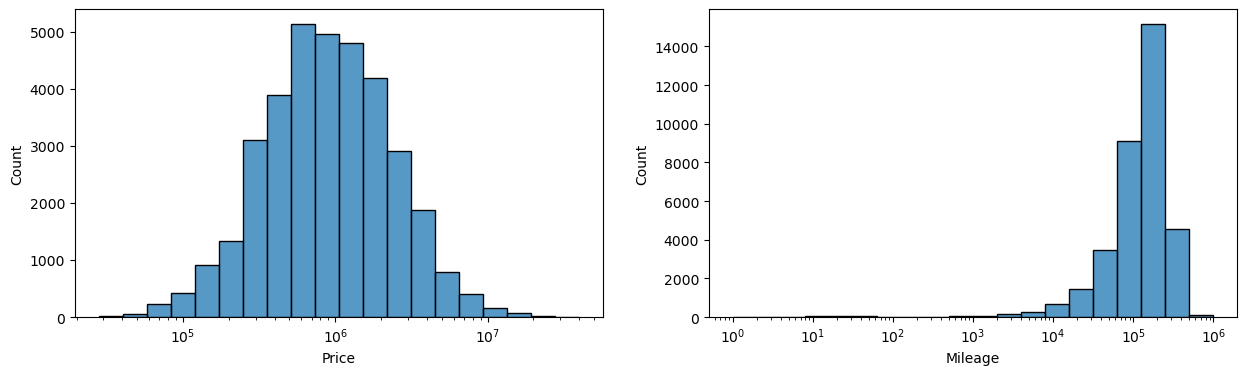

In [46]:
# Построим колонки Price и Mileage в логарифмической шкале:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plt.subplot(1, 2, 1)
ax1 = sns.histplot(data=df, x='Price', bins = 20, log_scale = True)
plt.subplot(1, 2, 2)
ax2 = sns.histplot(data=df, x='Mileage', bins = 20, log_scale = True)

В колонке Mileage остались автомобили с маленьким пробегом. Полагаю, что это не аномалии, а действительно новые машины, которые не были в активной эксплуатации. Для 'нормализации' распределения, данные будут обработаны по квантиляем в разделе предварительной обработки.

### Зависимости параметров друг от друга

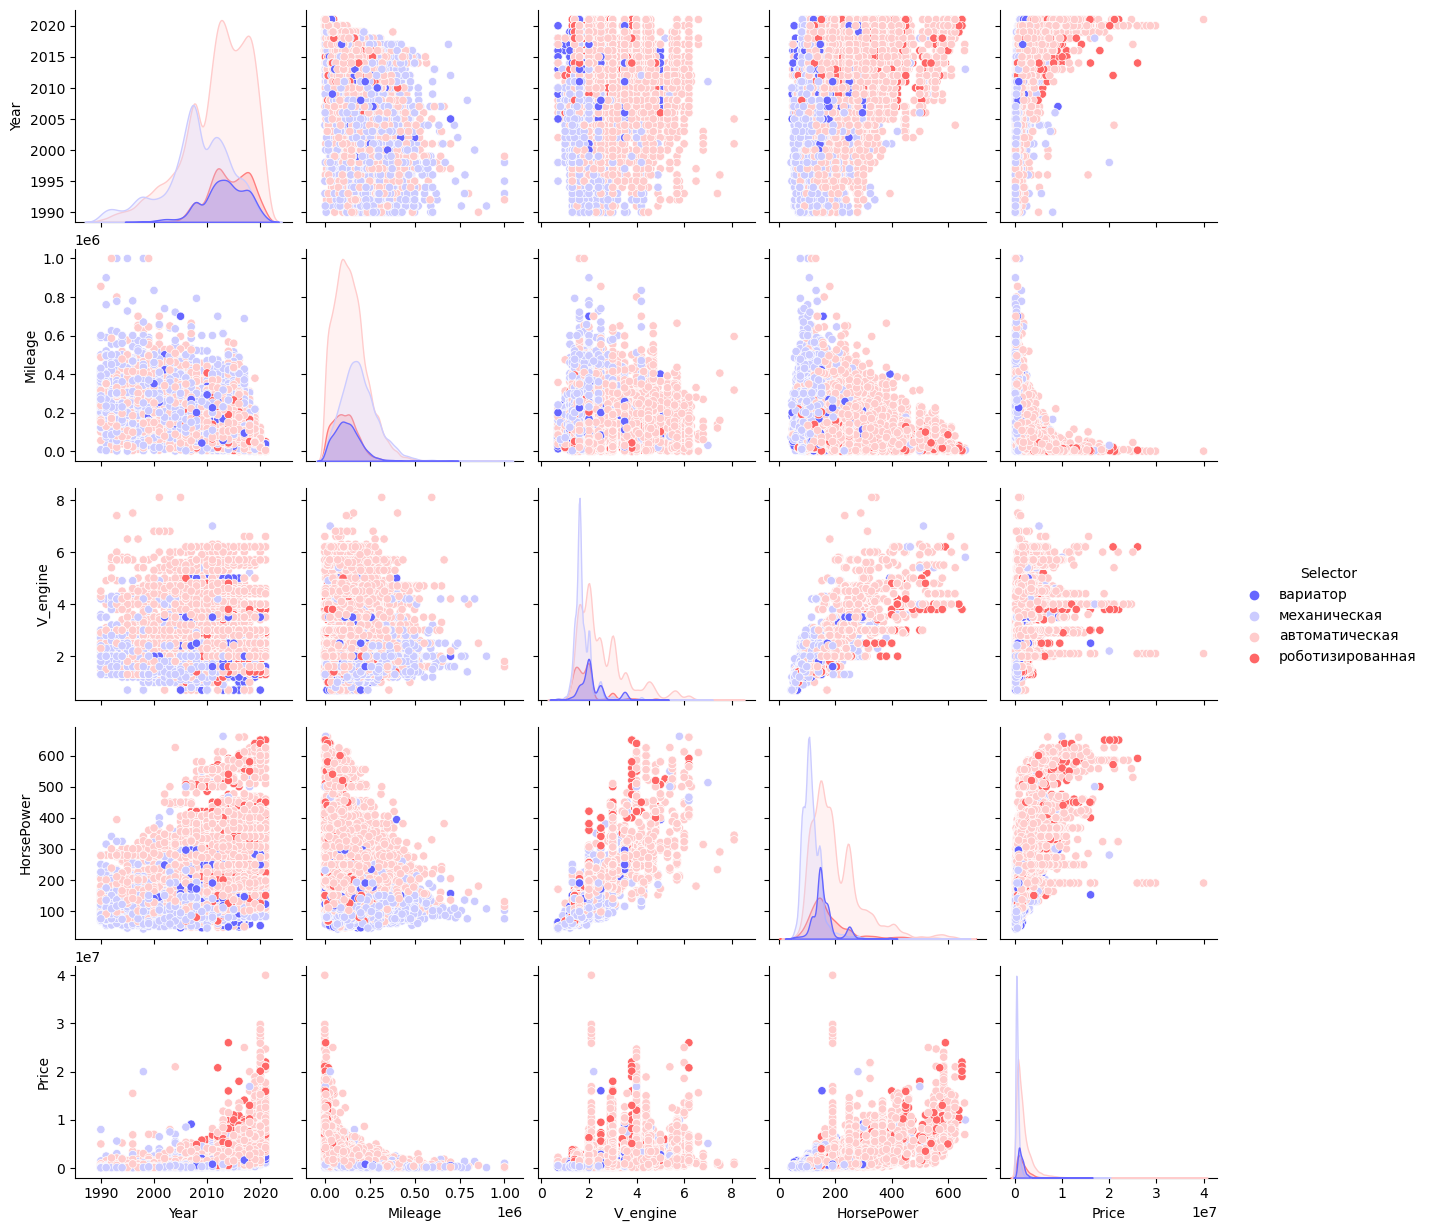

In [47]:
sns.pairplot(data = df, hue ='Selector', palette = 'bwr')

### Сгруппированная гистограмма распределения

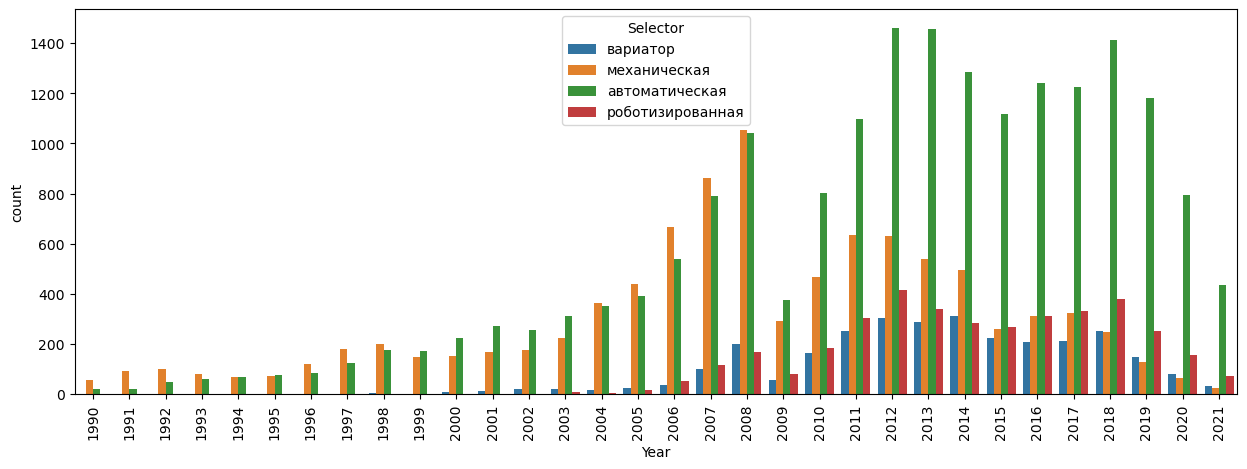

In [48]:
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.countplot(data=df, x="Year", hue="Selector", ax=ax)
ax.tick_params(axis='x', rotation=90)

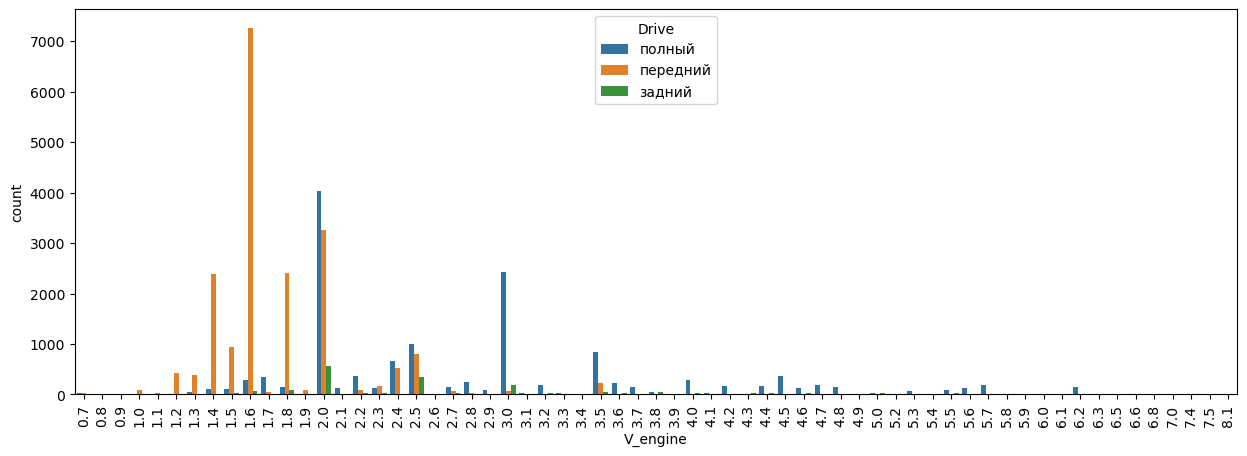

In [49]:
fig, ax = plt.subplots(1, figsize=(15, 5))
sns.countplot(data=df, x="V_engine", hue="Drive", ax=ax)
ax.tick_params(axis='x', rotation=90)

### Скатерограмма данных

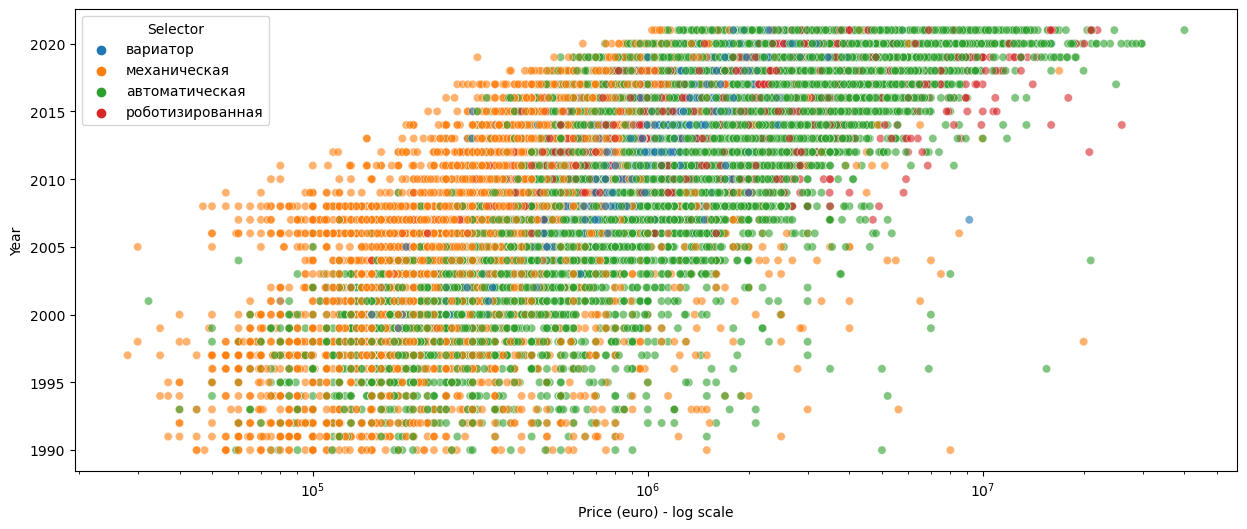

In [50]:
fig, ax = plt.subplots(1, figsize=(15, 6))
sns.scatterplot(data=df, x='Price', y='Year', hue='Selector', alpha = 0.6, ax=ax)
plt.xscale("log")
plt.xlabel("Price (euro) - log scale");

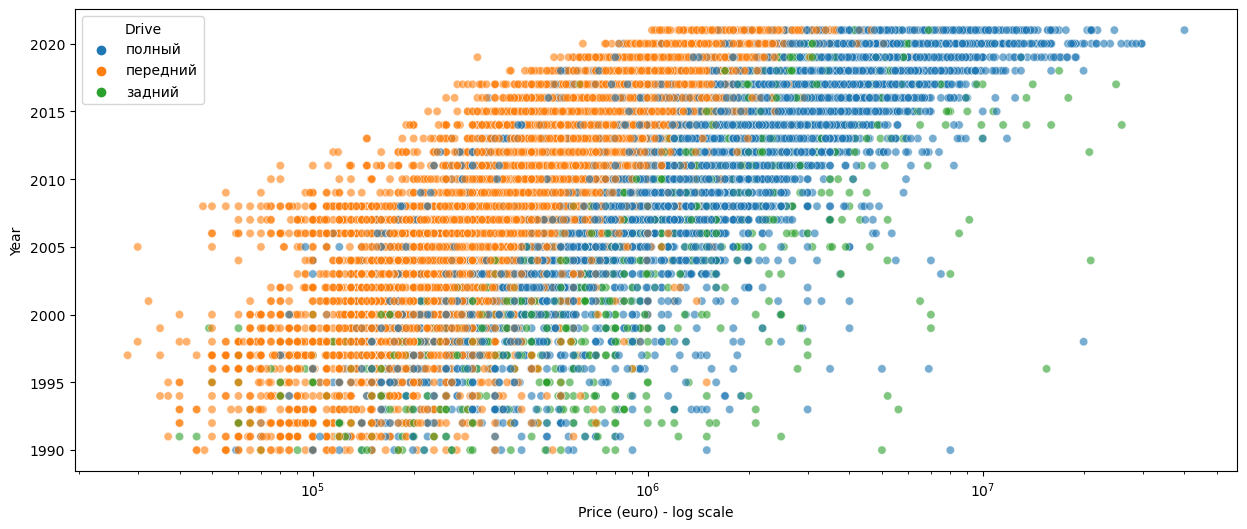

In [51]:
fig, ax = plt.subplots(1, figsize=(15, 6))
sns.scatterplot(data=df, x='Price', y='Year', hue='Drive', alpha = 0.6, ax=ax)
plt.xscale("log")
plt.xlabel("Price (euro) - log scale");

### Boxplot

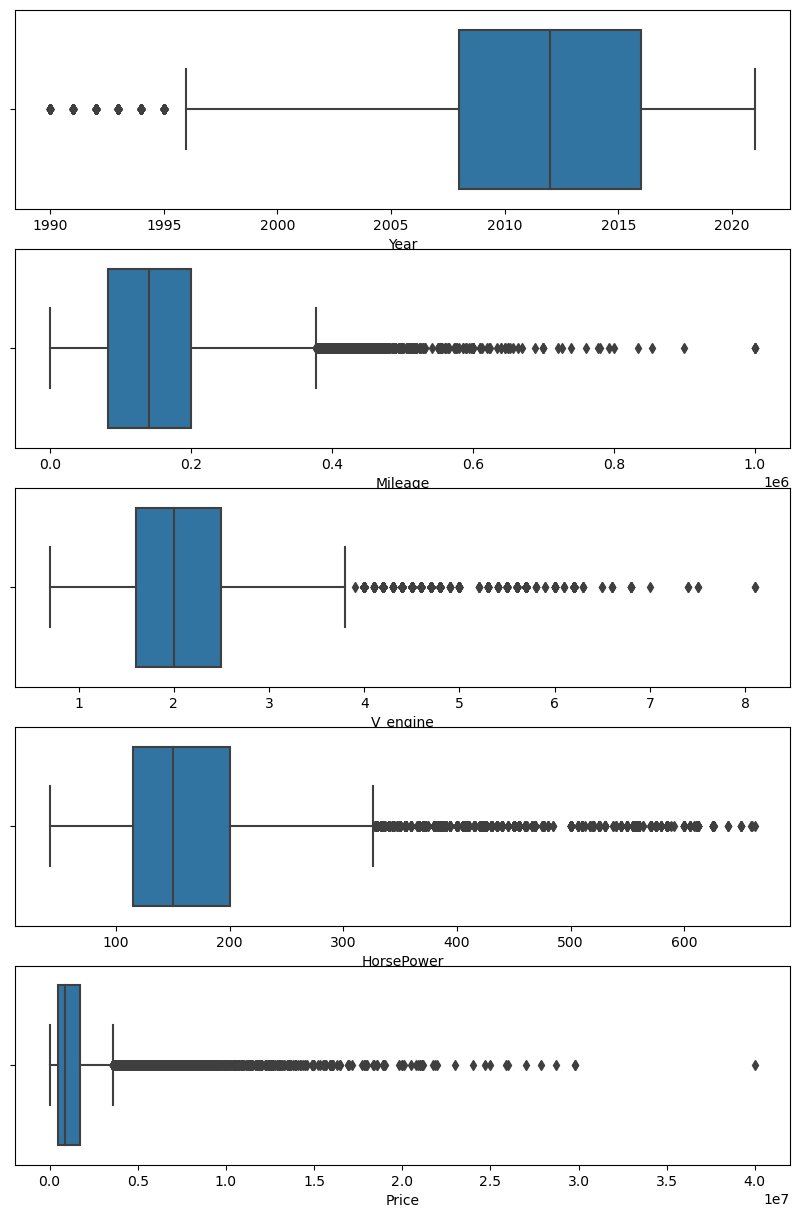

In [52]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,15))

for idx, column_name in enumerate(num_columns):

    plt.subplot(5,1, idx+1)
    sns.boxplot(data=df, x=column_name); 

Аномалии будут удалены в предварительной обработке данный с помощью квантилей.

## 4) Предварительная обработка данных

### Числовые признаки

#### Стандартизация

In [53]:
scale = StandardScaler()
scale.fit(df[num_columns]);

In [54]:
# Посмотрим на матожидание и среднее квадратичное отклонение
scale.mean_, scale.scale_

(array([2.01123430e+03, 1.50597402e+05, 2.23279213e+00, 1.71995976e+02,
        1.40716604e+06]),
 array([6.19191713e+00, 9.47582275e+04, 9.29442103e-01, 8.52600424e+01,
        1.71161760e+06]))

In [55]:
# Применим на данных
scaled = scale.transform(df[num_columns])
df_standard = pd.DataFrame(scaled, columns = num_columns)
df_standard

,Year,Mileage,V_engine,HorsePower,Price
0,0.285162,-0.704925,0.287493,-0.011682,0.054237
1,0.446663,-0.562826,-0.465647,-0.375275,-0.237884
2,0.931165,-1.082728,-0.680830,-0.574665,-0.270017
3,-0.037840,1.492246,-0.896013,-0.586394,-0.509557
4,0.608163,-0.468481,-0.465647,0.211166,0.208478
...,...,...,...,...,...
35287,1.092666,-0.177382,-0.680830,-0.820970,-0.462817
35288,0.446663,-0.492120,0.825450,0.903167,1.166636
35289,0.608163,-0.449538,-0.680830,-0.422190,0.054238
35290,-0.360842,1.143991,-0.680830,-0.867886,-0.649775


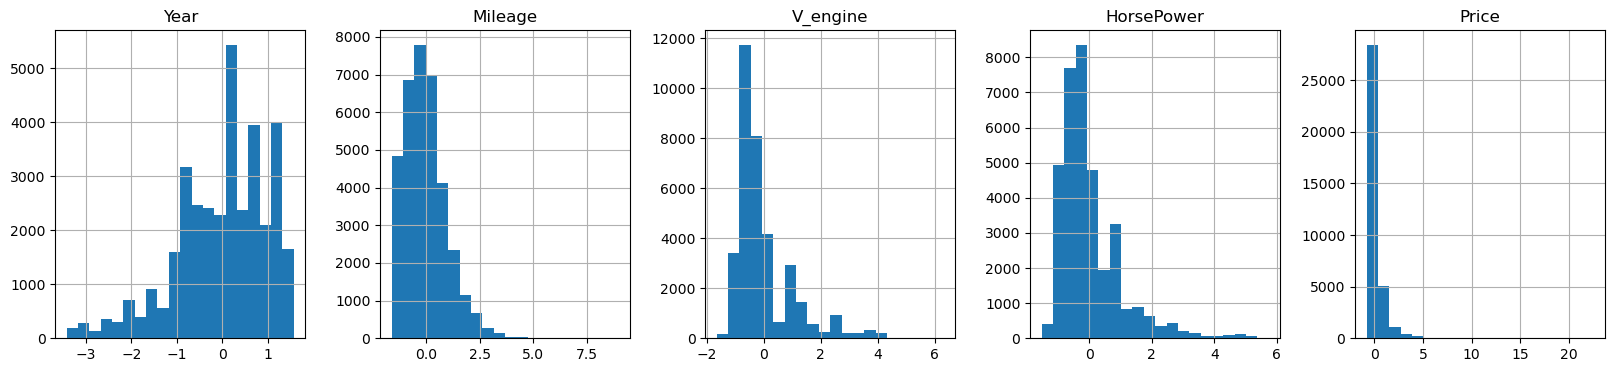

In [56]:
df_standard.hist(figsize = (20,4), layout= (1,5), bins=20);

#### Нормализация

In [57]:
norm = MinMaxScaler()
norm.fit(df[num_columns]);

In [58]:
# Посмотрим на min и max значения
norm.data_max_, norm.data_min_

(array([2.021e+03, 1.000e+06, 8.100e+00, 6.620e+02, 3.999e+07]),
 array([1.99e+03, 1.00e+00, 7.00e-01, 4.20e+01, 2.80e+04]))

In [59]:
# Применим на данных
normed = norm.transform(df[num_columns])
df_norm = pd.DataFrame(normed, columns = num_columns)
df_norm

,Year,Mileage,V_engine,HorsePower,Price
0,0.741935,0.083799,0.243243,0.208065,0.036835
1,0.774194,0.097264,0.148649,0.158065,0.024323
2,0.870968,0.047999,0.121622,0.130645,0.022947
3,0.677419,0.291999,0.094595,0.129032,0.012687
4,0.806452,0.106204,0.148649,0.238710,0.043441
...,...,...,...,...,...
35287,0.903226,0.133788,0.121622,0.096774,0.014689
35288,0.774194,0.103964,0.310811,0.333871,0.084480
35289,0.806452,0.107999,0.121622,0.151613,0.036835
35290,0.612903,0.258999,0.121622,0.090323,0.006681


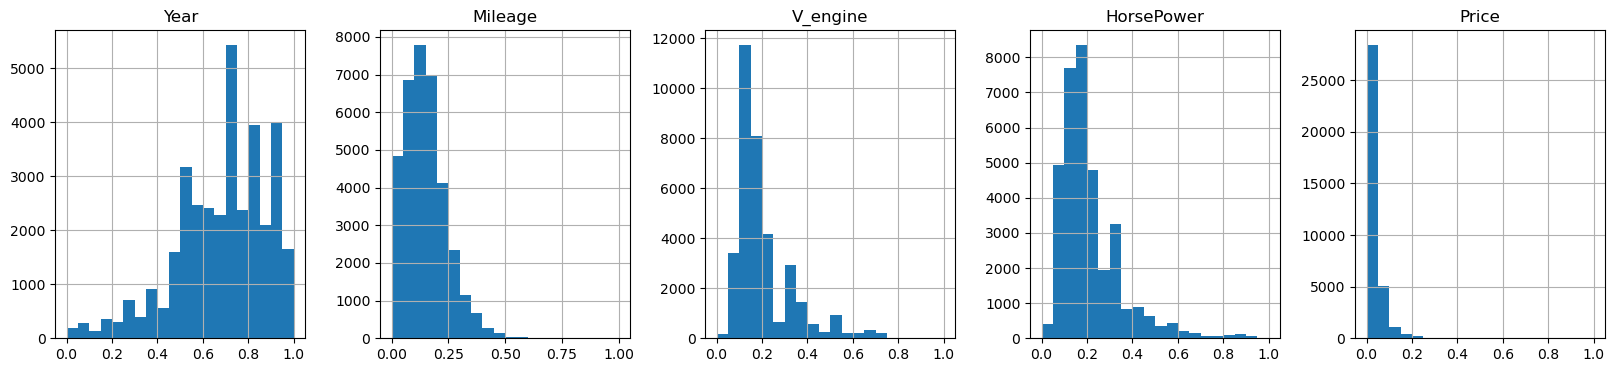

In [60]:
df_norm.hist(figsize = (20,4), layout= (1,5), bins=20);

#### Степенное преобразование

In [61]:
pt = PowerTransformer()
pt.fit(df_standard[num_columns]) # Использовался стандартизованный датасет, чтобы значения не выходили за пределы ограничений Python

PowerTransformer()

In [62]:
# Коэффициенты степенного преобразования
pt.lambdas_

array([ 1.52051131,  0.50834514, -0.22655951, -0.0600247 , -0.68269052])

In [63]:
# Применим на данных
power = pt.transform(df_standard[num_columns])
df_power = pd.DataFrame(power, columns= num_columns)
df_power

,Year,Mileage,V_engine,HorsePower,Price
0,0.137714,-0.689347,0.740158,0.349923,0.619635
1,0.337778,-0.498299,-0.342916,-0.192012,0.062439
2,1.007607,-1.235353,-0.821845,-0.563921,-0.014651
3,-0.223502,1.399351,-1.382297,-0.587460,-0.698855
4,0.549831,-0.376049,-0.342916,0.599765,0.825785
...,...,...,...,...,...
35287,1.252371,-0.023409,-0.821845,-1.097239,-0.549609
35288,0.337778,-0.406327,1.144780,1.144271,1.519384
35289,0.549831,-0.351957,-0.821845,-0.274729,0.619636
35290,-0.533764,1.155888,-0.821845,-1.208139,-1.195157


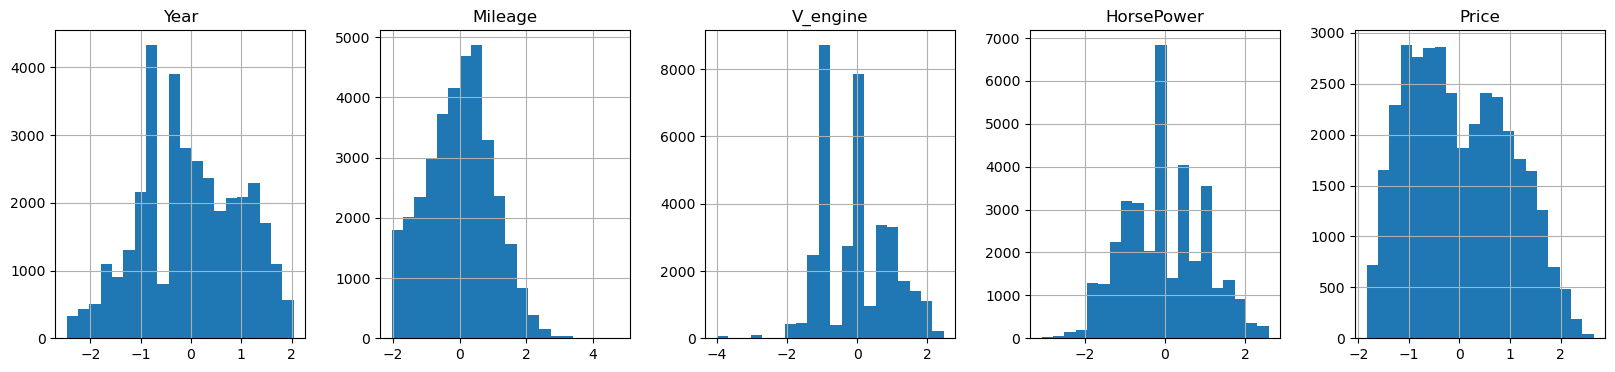

In [64]:
df_power.hist(figsize = (20,4), layout= (1,5), bins=20);

### Категориальные признаки

#### Порядковое кодирование

In [65]:
ordinal = OrdinalEncoder()
ordinal.fit(df[cat_columns]);

In [66]:
# Посмотрим на список категорий
ordinal.categories_

[array([' Бензин', ' Бензин, газобаллонное оборудование', ' Газ',
        ' Газ, газобаллонное оборудование', ' Гибрид', ' Дизель',
        ' Дизель, газобаллонное оборудование'], dtype=object),
 array(['1 владелец', '2 владельца', '3 или более'], dtype=object),
 array(['Дубликат', 'Оригинал'], dtype=object),
 array(['автоматическая', 'вариатор', 'механическая', 'роботизированная'],
       dtype=object),
 array(['бежевый', 'белый', 'голубой', 'жёлтый', 'зелёный', 'золотистый',
        'коричневый', 'красный', 'оранжевый', 'пурпурный', 'розовый',
        'серебристый', 'серый', 'синий', 'фиолетовый', 'чёрный'],
       dtype=object),
 array(['внедорожник 3 дв.', 'внедорожник 5 дв.', 'внедорожник открытый',
        'кабриолет', 'компактвэн', 'купе', 'купе-хардтоп', 'лимузин',
        'лифтбек', 'микровэн', 'минивэн', 'пикап двойная кабина',
        'пикап одинарная кабина', 'пикап полуторная кабина', 'родстер',
        'седан', 'седан-хардтоп', 'тарга', 'универсал 5 дв.', 'фургон',
      

In [67]:
# Применим на данных
ordinal_encoded = ordinal.transform(df[cat_columns])
df_ordinal = pd.DataFrame(ordinal_encoded, columns = cat_columns)
df_ordinal

,EngineType,Owners,Passport,Selector,Color,CarBodyType,Drive,Manufacturer
0,0.0,1.0,1.0,1.0,11.0,1.0,2.0,23.0
1,0.0,0.0,1.0,2.0,15.0,4.0,1.0,18.0
2,0.0,1.0,1.0,0.0,13.0,15.0,1.0,10.0
3,0.0,1.0,1.0,3.0,11.0,8.0,1.0,22.0
4,0.0,1.0,1.0,3.0,15.0,15.0,1.0,0.0
...,...,...,...,...,...,...,...,...
35287,0.0,1.0,1.0,0.0,1.0,15.0,1.0,20.0
35288,5.0,1.0,1.0,0.0,15.0,1.0,2.0,1.0
35289,0.0,1.0,1.0,0.0,1.0,15.0,0.0,1.0
35290,0.0,1.0,1.0,2.0,15.0,15.0,1.0,16.0


#### One-hot кодирование

In [68]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)
ohe.fit(df[cat_columns])

OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

In [69]:
# Посмотрим на список категорий
ohe.categories_

[array([' Бензин', ' Бензин, газобаллонное оборудование', ' Газ',
        ' Газ, газобаллонное оборудование', ' Гибрид', ' Дизель',
        ' Дизель, газобаллонное оборудование'], dtype=object),
 array(['1 владелец', '2 владельца', '3 или более'], dtype=object),
 array(['Дубликат', 'Оригинал'], dtype=object),
 array(['автоматическая', 'вариатор', 'механическая', 'роботизированная'],
       dtype=object),
 array(['бежевый', 'белый', 'голубой', 'жёлтый', 'зелёный', 'золотистый',
        'коричневый', 'красный', 'оранжевый', 'пурпурный', 'розовый',
        'серебристый', 'серый', 'синий', 'фиолетовый', 'чёрный'],
       dtype=object),
 array(['внедорожник 3 дв.', 'внедорожник 5 дв.', 'внедорожник открытый',
        'кабриолет', 'компактвэн', 'купе', 'купе-хардтоп', 'лимузин',
        'лифтбек', 'микровэн', 'минивэн', 'пикап двойная кабина',
        'пикап одинарная кабина', 'пикап полуторная кабина', 'родстер',
        'седан', 'седан-хардтоп', 'тарга', 'универсал 5 дв.', 'фургон',
      

In [70]:
# Применим на данных
ohe_feat = ohe.transform(df[cat_columns])
df_ohe = pd.DataFrame(ohe_feat, columns = ohe.get_feature_names_out()).astype(int)
df_ohe

,EngineType_ Бензин,"EngineType_ Бензин, газобаллонное оборудование",EngineType_ Газ,"EngineType_ Газ, газобаллонное оборудование",EngineType_ Гибрид,EngineType_ Дизель,"EngineType_ Дизель, газобаллонное оборудование",Owners_1 владелец,Owners_2 владельца,Owners_3 или более,...,Manufacturer_Nissan,Manufacturer_Opel,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_SEAT,Manufacturer_Skoda,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35287,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
35288,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
35289,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
35290,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## 5) Pipelines

In [71]:
# Список всех имеющихся колонок
num_columns, cat_columns

(['Year', 'Mileage', 'V_engine', 'HorsePower', 'Price'],
 ['EngineType',
  'Owners',
  'Passport',
  'Selector',
  'Color',
  'CarBodyType',
  'Drive',
  'Manufacturer'])

#### Колонка V_engine

In [72]:
# Стандартизируем:
num_pipe_veng = Pipeline([
    ('scaler', StandardScaler())
])

num_veng = ['V_engine']

#### Колонка Mileage

In [73]:
# Нормируем. Пробег не подразумевается, что может быть отрицательным, поэтому не стандартизируем...
num_pipe_mile = Pipeline([
    ('normolizer', MinMaxScaler())
])

num_mile = ['Mileage']

#### Колонки Year и HorsePower

In [74]:
# Применяем степенное преобразование
num_pipe_year_hp = Pipeline([
    ('power', PowerTransformer())
])

num_year_hp = ['Year','HorsePower']

#### Колонки Owners и Passport

In [75]:
# Применяем порядковое кодирование, т.к. в Passport лишь 2 значения, а в Owners действительно есть зависимость в количестве предыдущих владельцев
cat_pipe_own_pass = Pipeline([
    ('encoder', OrdinalEncoder())

])

cat_own_pass = ['Owners', 'Passport']

#### Колонки EngineType, Selector, Color, CarBodyType, Drive и Manufacturer

In [76]:
# Применяем One-hot кодирование
cat_pipe_ohe = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])

cat_ohe = ['EngineType', 'Selector', 'Color', 'CarBodyType', 'Drive', 'Manufacturer']

Колонку Price оставляем без изменений "как есть", т.к. по ней будем выполнять предсказание.
#### Объединяем все колонки в единый трансформер

In [77]:
preprocessors = ColumnTransformer(transformers=[
    ('num_veng', num_pipe_veng, num_veng),
    ('num_mile', num_pipe_mile, num_mile),
    ('num_year_hp', num_pipe_year_hp, num_year_hp),
    ('num_price', 'passthrough', ['Price']),
    ('cat_own_pass', cat_pipe_own_pass, cat_own_pass),
    ('cat_ohe', cat_pipe_ohe, cat_ohe),
])

In [78]:
preprocessors

ColumnTransformer(transformers=[('num_veng',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['V_engine']),
                                ('num_mile',
                                 Pipeline(steps=[('normolizer',
                                                  MinMaxScaler())]),
                                 ['Mileage']),
                                ('num_year_hp',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['Year', 'HorsePower']),
                                ('num_price', 'passthrough', ['Price']),
                                ('cat_own_pass',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['Owners', 'Passport']),
                                ('cat_ohe',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['EngineType', 'Selector', 'Color',
                                  'CarBodyType', 'Drive', 'Manufacturer'])])

In [79]:
# обучаем преобразователь
preprocessors.fit(df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3308: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


ColumnTransformer(transformers=[('num_veng',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['V_engine']),
                                ('num_mile',
                                 Pipeline(steps=[('normolizer',
                                                  MinMaxScaler())]),
                                 ['Mileage']),
                                ('num_year_hp',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['Year', 'HorsePower']),
                                ('num_price', 'passthrough', ['Price']),
                                ('cat_own_pass',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['Owners', 'Passport']),
                                ('cat_ohe',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['EngineType', 'Selector', 'Color',
                                  'CarBodyType', 'Drive', 'Manufacturer'])])

In [80]:
cat_ohe_names = preprocessors.transformers_[5][1]['encoder'].get_feature_names_out(cat_ohe)

# объединяем названия колонок в один список
columns = np.hstack([num_veng,
                    num_mile,
                    num_year_hp,
                    ['Price'],
                    cat_own_pass,
                    cat_ohe_names])

In [81]:
df_transformed = preprocessors.transform(df)
pd.DataFrame(df_transformed, columns=columns)

,V_engine,Mileage,Year,HorsePower,Price,Owners,Passport,EngineType_ Бензин,"EngineType_ Бензин, газобаллонное оборудование",EngineType_ Газ,...,Manufacturer_Nissan,Manufacturer_Opel,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_SEAT,Manufacturer_Skoda,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen
0,0.287493,0.083799,0.233369,0.312543,1499999.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.465647,0.097264,0.411342,-0.174922,1000000.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.680830,0.047999,0.970140,-0.514865,945000.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.896013,0.291999,-0.110676,-0.536976,535000.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.465647,0.106204,0.593399,0.552000,1764000.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35287,-0.680830,0.133788,1.165011,-1.043041,615000.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
35288,0.825450,0.103964,0.411342,1.116337,3404000.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35289,-0.680830,0.107999,0.593399,-0.249316,1500000.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35290,-0.680830,0.258999,-0.439432,-1.161805,295000.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# Сохраним датафрейм в файл
pd.DataFrame(df_transformed, columns=columns).to_csv('autoru_final.csv')